<a href="https://colab.research.google.com/github/Mohamed-derbeli/Hate_Speech_Detection_Using_Transformers/blob/main/Hate_Speech_Detection_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from scipy import stats
import pickle

import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger') 
nltk.download('omw-1.4')

# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from wordcloud import WordCloud

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import tensorflow.keras.regularizers as regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dense,SpatialDropout1D

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils import resample
import seaborn
import pickle

from google.colab import drive
drive.mount('/content/drive')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import Dataset

In [2]:
url='https://raw.githubusercontent.com/Mohamed-derbeli/Hate_Speech_Detection_Using_Transformers/main/train_E6oV3lV.csv'

df= pd.read_csv(url)

In [3]:
pd.set_option('display.max_colwidth', None)
df.sample(30)

,id,label,tweet
436,437,0,fab &amp; interesting day at #eacbpm. now dash to a quiet place to dial into iiba emea region meeting #busy :)
5888,5889,1,indianapolis colts black cheerleader hugs boy who used slur. so. much. class
4111,4112,0,happy wednesday cornerhouse!! sharing the love! #fresh #student #living #midweek
4097,4098,0,really enjoying this talk by @user #maps are inherently delightful ... so is thinking ...
25676,25677,1,"@user video: @user on #hateful #liberals ""#america has had enough of this crap!"" @user"
16850,16851,0,"the most cheesiest picture ever, but i love it ðâ¤ #love #cheese #wedding #husbandandwife â¦"
16246,16247,0,@user looks like i have this outline nailed down. #amwriting
30050,30051,0,so right now! #finally going to try some #hummus #beenunderarock #dizengoff #pita #pickles #zaatar...
19806,19807,0,"going back to that ballroom after 26 years.. omg, the memories!! #memory"
1961,1962,0,@user same ððð


In [4]:
df.index=df["id"]
df.drop('id', axis=1, inplace=True)
df.sample(5)

,label,tweet
id,,
13953,0,@user happy people vs unhappy people #mindfulness #stress #socialmedia #quotes #friends
17451,0,1k!!!! we are sooo happy. thank you all ððð #clubtuas #1k #followers #amazing #thankyouâ¦
14754,0,good friends!!!!!â¤ lovin life! #lifted #friends #homeâ¦
6169,0,safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!
6283,0,on route to ally pally #boxcup @user @user @user @user


### Data Analysis

In [5]:
print(f'Number of Observations: {df.shape[0]}')
print(f'Number of Features: {df.shape[1]}')

Number of Observations: 31962
Number of Features: 2


In [6]:
#  Check the Missing Value
df.isnull().sum()

label    0
tweet    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31962 entries, 1 to 31962
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   31962 non-null  int64 
 1   tweet   31962 non-null  object
dtypes: int64(1), object(1)
memory usage: 749.1+ KB


In [8]:
# Extracting the Target Attribute for Each Class and Visualize
hate_speech = df[df['label'] == 1].shape[0]
free_speech = df[df['label'] == 0].shape[0]
print('Hate Speech =', hate_speech)
print('Free Speech =', free_speech)

Hate Speech = 2242
Free Speech = 29720


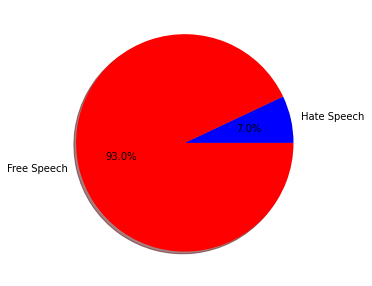

In [9]:
# Visualize the Label Class
speech = [hate_speech, free_speech]
label = ["Hate Speech", "Free Speech"]

plt.figure(figsize=(5, 5))
plt.pie(speech, labels = label, shadow = True, autopct = '%1.1f%%', colors=['blue', 'red'])
plt.style.use('fivethirtyeight')
plt.show()

Note: It is clear that our data is not balanced and this may couse a misleading in the training accuracy. 

### Add features

In [10]:
# Number of characters in the text
df['tweet_length'] = df['tweet'].apply(len)

# Number of words in the text
df['tweet_num_words'] = df['tweet'].apply(lambda x: len(x.split()))

# Average length of the words in the text
df["mean_word_len"] = df["tweet"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

# Number of non-stopwords in the text: first we will extend the stopwords to include other words used in twitter
# such as retweet(rt) etc.

# nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words("english")
other_exclusions = ["#ff", "ff", "rt"]
stopwords.extend(other_exclusions)
df['tweet_non_stopwords'] = df['tweet'].apply(lambda x: len([t for t in x.split() if t not in stopwords]))
df.describe().T

,count,mean,std,min,25%,50%,75%,max
label,31962.0,0.070146,0.255397,0.0,0.000000,0.0,0.0,1.000000
tweet_length,31962.0,84.739628,29.455749,11.0,63.000000,88.0,108.0,274.000000
tweet_num_words,31962.0,13.158720,5.478150,3.0,9.000000,13.0,17.0,34.000000
mean_word_len,31962.0,5.593463,1.945719,1.0,4.529412,5.2,6.2,81.333333
tweet_non_stopwords,31962.0,9.121144,3.474333,0.0,7.000000,9.0,11.0,27.000000


In [11]:
df.head()

,label,tweet,tweet_length,tweet_num_words,mean_word_len,tweet_non_stopwords
id,,,,,,
1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,102,18,4.555556,8
2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,122,19,5.315789,14
3,0,bihday your majesty,21,3,5.666667,2
4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,86,14,4.928571,9
5,0,factsguide: society now #motivation,39,4,8.000000,3


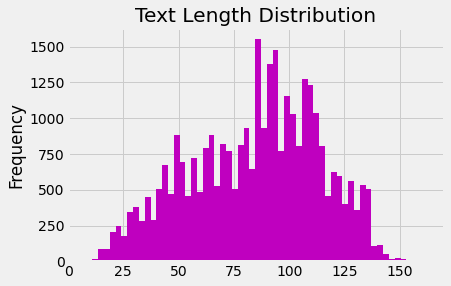

In [12]:
df["tweet_length"].plot(kind='hist', title='Text Length Distribution', xlim=[0, 170], bins = 100, figsize=(6,4),color='m')
plt.show()

**Note** : Distribution of text-length is between 5 and 150 where the most tweets-length are around 90 characters. It is also noticable that the number of tweets seem to be skewed.

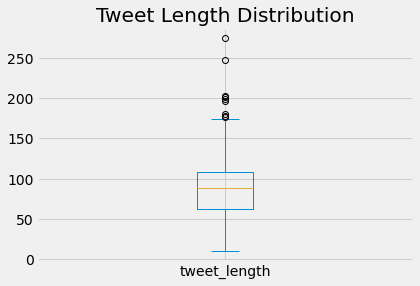

In [13]:
df["tweet_length"].plot(kind='box', title='Tweet Length Distribution', figsize=(6,4))
plt.show()

## Data Preprocessing

#### 1. Text Cleaning
- Lowercase
- Remove Punctuation
- Remove Urls
- Removing @tags
- Remove Special Characters

#### 2. Preprocessing Operations
- Tokenizing
- Removing Stop Words
- Lemmatization
- WordCloud

In [14]:
def clean_txt(tweet):
    
    # removal of extra spaces
    regex_pat = re.compile(r'\s+')
    Tweet = re.sub(regex_pat," ",tweet)
    
    #Remove @tags
    Tweet= re.sub(r'@[\w\-]+',"",Tweet)
    
    # removal of links[https://abc.com]
    url_regex =  re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
            '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    Tweet = re.sub(url_regex,"",Tweet)
    
    # split into words (tokenizing)
    Tweet = nltk.word_tokenize(Tweet)
    
    # convert to lower case
    Tweet = [w.lower() for w in Tweet]    
    
    # remove punctuation from each word
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    Tweet = [re_punc.sub('', w) for w in Tweet]

    # remove remaining tokens that are not alphabetic
    Tweet = [word for word in Tweet if word.isalpha()]

    # filter out stop words
    Tweet = [w for w in Tweet if w not in  stopwords] 
    
    # filter out short tokens
    Tweet = [word for word in Tweet if len(word) > 2]

    #Stemm all the words in the sentence
    lemmatizer = WordNetLemmatizer() 
    lem_words = [lemmatizer.lemmatize(word) for word in Tweet]
    combined_text = ' '.join(lem_words)
    return combined_text

# Cleaning the text data
df['cleaned_phrase'] = df['tweet'].apply(clean_txt)
df.sample(10)

,label,tweet,tweet_length,tweet_num_words,mean_word_len,tweet_non_stopwords,cleaned_phrase
id,,,,,,,
31946,0,feel like... ðð¶ð #dog #summer #hot #help #sun #day #more,68,10,5.600000,10,feel like dog summer hot help sun day
17610,0,just finished this book and thinking how we can't forget the past. so hard to think about wwii and germany,110,20,4.350000,10,finished book thinking forget past hard think wwii germany
13353,0,i am clean. #i_am #positive #affirmation,45,6,5.833333,4,clean iam positive affirmation
24344,0,with bffs... #coffee #talk #cake #yum #quality #time #sweet #gossip #smile #laughâ¦,87,12,6.083333,11,bffs coffee talk cake yum quality time sweet gossip smile
16240,0,"morning! hope everyone has a wonderful, fun-filled day #health #wealth #fitness #fitcoachclaire #nutrition",108,13,7.230769,11,morning hope everyone wonderful funfilled day health wealth fitness fitcoachclaire nutrition
6221,0,a #drawing i made a while ago,32,7,3.285714,3,drawing made ago
2870,0,officially launching our new shop in the @user this afternoon with the lovely @user,86,14,5.000000,8,officially launching new shop afternoon lovely
29927,0,cavs win this season in nba #nbafinals #game7 #lebronjames #champions,75,10,6.000000,8,cavs win season nba nbafinals lebronjames champion
6238,0,depressed blvck princ3 âï¸ðâ¹ï¸ð #clubkid #dpressed #blvck #prince ness #hate #tired â¦,102,12,7.333333,12,depressed blvck clubkid dpressed blvck prince ness hate tired


In [15]:
# label_list = df.label.values.tolist()
cleaned_phrase_list = df.cleaned_phrase.values.tolist()
# print(cleaned_phrase_list)
# print(label_list)

In [16]:
# def to_array(text):
#     array = np.array(text)
#     return array

Y = df.label.to_numpy()
Y

array([0, 0, 0, ..., 0, 1, 0])

In [17]:
#tokenization
max_words = 10000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(cleaned_phrase_list)
sequences = tok.texts_to_sequences(cleaned_phrase_list)
sequences_matrix = pad_sequences(sequences,maxlen=max_len)
sequences_matrix

array([[   0,    0,    0, ...,  116, 6570,  306],
       [   0,    0,    0, ..., 3630, 6572, 8402],
       [   0,    0,    0, ...,    0,   17, 2812],
       ...,
       [   0,    0,    0, ..., 6355,   24,   59],
       [   0,    0,    0, ..., 1330, 1331,  421],
       [   0,    0,    0, ...,    0,   90,   99]], dtype=int32)

# LSTM

In [18]:
# from tensorflow.keras.initializers import Constant
# from tensorflow.keras.optimizers import Adam


embedding_mat_col=512

# model = Sequential()
# model.add(Embedding(input_dim=max_words, output_dim=embedding_mat_col, input_length=max_len))
# model.add(SpatialDropout1D(0.4))
# model.add(LSTM(50, dropout=0.4, recurrent_dropout=0.4,input_shape=(None, 512)))
# model.add(Dense(1,activation='softmax'))

# dropout=0.4, recurrent_dropout=0.4, 

model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=max_words, output_dim=embedding_mat_col, input_length=max_len),
    tf.keras.layers.LSTM(20, input_shape=(None, 512)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 512)          5120000   
                                                                 
 lstm (LSTM)                 (None, 20)                42640     
                                                                 
 batch_normalization (BatchN  (None, 20)               80        
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 8)                 168       
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                        

In [19]:
X=sequences_matrix

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.1, random_state = 1, shuffle=True)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(28765, 150) (28765,)
(3197, 150) (3197,)


In [20]:
batch_size =32
model.fit(X_train, Y_train, epochs = 1, batch_size=batch_size,verbose = 1)

pickle.dump(model, open('/content/drive/MyDrive/Colab Notebooks/model_LSTM.pkl','wb'))

model = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/model_LSTM.pkl','rb'))

899/899 [==============================] - 144s 157ms/step - loss: 0.1769 - accuracy: 0.9484


In [21]:
prediction=model.predict(X_test)

100/100 [==============================] - 3s 28ms/step


In [22]:
Hate_Free=[]
predictions=[]
for itm in prediction:
  predictions.append(itm)
  # if int(itm)==0:
  #     Hate_Free.append("Hate_Speech")
  # else:
  #     Hate_Free.append("Free_Speech")

results = pd.DataFrame({'label':Y_test,'prediction':predictions})
results["prediction"]=results["prediction"].astype(int)

# print(results.sample(10))
# results.info()
        
  #  astype(str).     
print('Test Accuracy: ', accuracy_score(results.label, results.prediction) * 100, '\n')
print('Confusion Matrix : \n',confusion_matrix(results.label, results.prediction), '\n')
print('Classification Report : \n ',classification_report(results.label, results.prediction), '\n')

Test Accuracy:  92.71191742258367 

Confusion Matrix : 
 [[2964    0]
 [ 233    0]] 

Classification Report : 
                precision    recall  f1-score   support

           0       0.93      1.00      0.96      2964
           1       0.00      0.00      0.00       233

    accuracy                           0.93      3197
   macro avg       0.46      0.50      0.48      3197
weighted avg       0.86      0.93      0.89      3197
 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Note: As we mentioned earlier, the Imbalanced data may cause misleading in the training accuracy. This was proven by the above results since the precision in the classification report is high with 0 and null with 1.

# Balance the dataset

### Over Sampling

In [23]:
def oversample(dataset):
  """Oversample minoriity class because of the imbalance"""
  # Separate majority and minority classes in data for oversampling
  majority = dataset[dataset['label'] == 0]
  minority = dataset[dataset['label'] == 1]

  print("majority class before oversample: ", majority.shape)
  print("minority class before oversample: ", minority.shape)

  # Upsample minority class
  minority_oversampled = resample(minority, 
                                 replace=True,      # sample with replacement
                                 n_samples= majority.shape[0],  # to match majority class
                                 random_state=123)  # reproducible results
 
  # Combine majority class with oversampled minority class
  oversampled = pd.concat([majority, minority_oversampled])
  # shuffling the data
  oversampled = oversampled.sample(frac=1).reset_index(drop=True)
  # Display new class counts
  print("After oversampling\n", oversampled.label.value_counts(), sep = "")
  return oversampled

In [24]:
X=df['cleaned_phrase'].values
Y=df['label'].values
# X_train, X_test, Y_train, Y_test = train_test_split(X,Y, stratify=Y,test_size = 0.01, random_state = 1, shuffle=True)

train_over = oversample(pd.DataFrame({"tweet": X, "label": Y}))
train_over.head()

majority class before oversample:  (29720, 2)
minority class before oversample:  (2242, 2)
After oversampling
0    29720
1    29720
Name: label, dtype: int64


,tweet,label
0,love korea instagram instagood girl friend girlfriend love beautiful,0
1,hatred greed amp destroyed many life mad leadership amp bad government policy destroyed politics,1
2,sea shepherd suppoers racist antiracism seashepherd,1
3,probably closeted posing black man long ago nuff said,1
4,like many people spend thing want spend family societytoday,0


In [31]:
X = train_over["tweet"]
Y = train_over["label"].to_numpy()

max_words = 10000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X)
sequences = tok.texts_to_sequences(X)
X = pad_sequences(sequences,maxlen=max_len)

(59440, 150) (53496,)


# LSTM for balanced dataset

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.1, random_state = 1, shuffle=True)

model.fit(X_train, Y_train, epochs = 1, batch_size=batch_size,verbose = 1)

pickle.dump(model, open('/content/drive/MyDrive/Colab Notebooks/model_LSTM.pkl','wb'))
model = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/model_LSTM.pkl','rb'))

1672/1672 [==============================] - 285s 169ms/step - loss: 0.1541 - accuracy: 0.9378


In [33]:
prediction=model.predict(X_test)

186/186 [==============================] - 6s 27ms/step


In [34]:
Hate_Free=[]
predictions=[]
for itm in prediction:
  predictions.append(itm)

results = pd.DataFrame({'label':Y_test,'prediction':predictions})
results["prediction"]=results["prediction"].astype(int)

print('Test Accuracy: ', accuracy_score(results.label, results.prediction) * 100, '\n')
print('Confusion Matrix : \n',confusion_matrix(results.label, results.prediction), '\n')
print('Classification Report : \n ',classification_report(results.label, results.prediction), '\n')

Test Accuracy:  49.96635262449529 

Confusion Matrix : 
 [[2970    0]
 [2974    0]] 

Classification Report : 
                precision    recall  f1-score   support

           0       0.50      1.00      0.67      2970
           1       0.00      0.00      0.00      2974

    accuracy                           0.50      5944
   macro avg       0.25      0.50      0.33      5944
weighted avg       0.25      0.50      0.33      5944
 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
print(results.sample(10))

      label  prediction
1873      0           0
3412      0           0
626       1           0
2548      0           0
2928      1           0
2792      1           0
5737      1           0
979       0           0
3324      1           0
1738      0           0


### Visualizations

Visualizing which of the word is most commonly used in the twitter dataset

In [ ]:
# imshow-Display data as an image
# interpolation - https://matplotlib.org/3.2.1/gallery/images_contours_and_fields/interpolation_methods.html
all_words = ' '.join([text for text in df['cleaned_phrase'] ])

wordcloud = WordCloud(width=800, 
                      height=500, 
                      random_state=21, 
                      max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Visualizing which of the word is most commonly used for hate speech

In [ ]:
hate_words = ' '.join([text for text in df['cleaned_phrase'][df['label'] == 1]])
wordcloud = WordCloud(width=800, 
                      height=500,
                      random_state=21, 
                      max_font_size=110).generate(hate_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Visualizing which of the word is most commonly used for free speech

In [ ]:
free_words = ' '.join([text for text in df['cleaned_phrase'][df['label'] == 0]])
wordcloud = WordCloud(width=800, 
                      height=500,
                      random_state=21, 
                      max_font_size=110).generate(free_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()